# Curve Fitting with Python

* Ref: [https://machinelearningmastery.com/curve-fitting-with-python/](https://machinelearningmastery.com/curve-fitting-with-python/)
* Data
  * [longley.csv](https://raw.githubusercontent.com/jbrownlee/Datasets/master/longley.csv)
  * [longley.names](https://github.com/jbrownlee/Datasets/blob/master/longley.names)

## Curve fitting

* 就是一個找出 mapping function (或叫做 basis function) 的過程
  * $f(x) = y$: mapping function
    * $x$: independent variable, inputs
    * $y$: dependent variable, outputs
  * 我們只有 observations $(x, y)$，並不知道 $f(x)$ 的公式，或是知道公式但是不曉得參數
    * 首先要定義 $f(x)$ 的公式，然後找出適當的參數使得 $f(x)$ 和 $y$ 的誤差最小
* SciPy 提供 `curve_fit()` 函數來做 curve fitting
  * [curve_fit()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)
  * `curve_fit()` 傳回 fit 到的最佳係數和 covariance matrix
    * `popt, pcov = curve_fit(mapping_function, x_data, y_data)`

## 1. Load data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/longley.csv'
df = pd.read_csv(url, header=None)
df.head()

,0,1,2,3,4,5,6
0,83.0,234.289,235.6,159.0,107.608,1947,60.323
1,88.5,259.426,232.5,145.6,108.632,1948,61.122
2,88.2,258.054,368.2,161.6,109.773,1949,60.171
3,89.5,284.599,335.1,165.0,110.929,1950,61.187
4,96.2,328.975,209.9,309.9,112.075,1951,63.221


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       16 non-null     float64
 1   1       16 non-null     float64
 2   2       16 non-null     float64
 3   3       16 non-null     float64
 4   4       16 non-null     float64
 5   5       16 non-null     int64  
 6   6       16 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 1.0 KB


In [3]:
# 把數據從 dataframe 中提取出來，變成一個 2 為的 numpy array
data = df.values
data

array([[  83.   ,  234.289,  235.6  ,  159.   ,  107.608, 1947.   ,
          60.323],
       [  88.5  ,  259.426,  232.5  ,  145.6  ,  108.632, 1948.   ,
          61.122],
       [  88.2  ,  258.054,  368.2  ,  161.6  ,  109.773, 1949.   ,
          60.171],
       [  89.5  ,  284.599,  335.1  ,  165.   ,  110.929, 1950.   ,
          61.187],
       [  96.2  ,  328.975,  209.9  ,  309.9  ,  112.075, 1951.   ,
          63.221],
       [  98.1  ,  346.999,  193.2  ,  359.4  ,  113.27 , 1952.   ,
          63.639],
       [  99.   ,  365.385,  187.   ,  354.7  ,  115.094, 1953.   ,
          64.989],
       [ 100.   ,  363.112,  357.8  ,  335.   ,  116.219, 1954.   ,
          63.761],
       [ 101.2  ,  397.469,  290.4  ,  304.8  ,  117.388, 1955.   ,
          66.019],
       [ 104.6  ,  419.18 ,  282.2  ,  285.7  ,  118.734, 1956.   ,
          67.857],
       [ 108.4  ,  442.769,  293.6  ,  279.8  ,  120.445, 1957.   ,
          68.169],
       [ 110.8  ,  444.546,  468.1  ,  263.

* 有了數據以後，先畫圖看看數據長什麼樣子

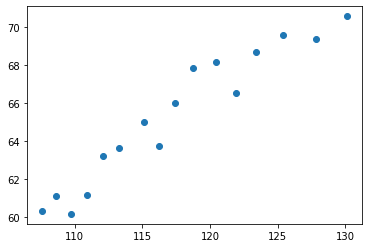

In [4]:
x = data[:, 4]
y = data[:, -1]

plt.figure()
plt.scatter(x, y)
plt.show()

## 2. Fitting

### 2.1 Linear function $f(x) = ax + b$

y = 0.48488 * x + 8.38067


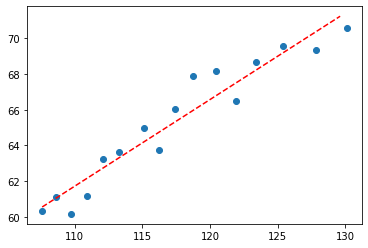

In [5]:
# define the true objective function
def objective_func(x, a, b):
    return a * x + b

# curve fit
popt, _ = curve_fit(objective_func, x, y)

# summarize the parameter values
a, b = popt
print('y = %.5f * x + %.5f' % (a, b))

# define a sequence of inputs between the smallest and largest know inputs
x_line = np.arange(min(x), max(x), 1)

# calculate the output for the range
y_line = objective_func(x_line, a, b)

# plot input vs output
fig = plt.figure()
plt.scatter(x, y)
plt.plot(x_line, y_line, '--', color='red')
plt.show()

### 2.2 Polynomial regression $f(x) = \sum_{i=0}^{N} a_{i}x_{i}$

* Use $y = ax + bx^2 + c$

y = 3.25443 * x + -0.01170 * x^2 + -155.02783


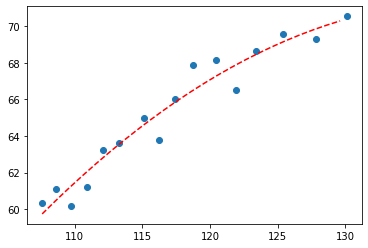

In [6]:
# define the true objective function
def func(x, a, b, c):
    return a * x + b * x**2 + c

# curve fit
popt, _ = curve_fit(func, x, y)

# summarize the parameter values
a, b, c = popt
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))

# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(x), max(x), 1)

# calculate the output for the range
y_line = func(x_line, a, b, c)

# plot input vs output
fig = plt.figure()
plt.scatter(x, y)
plt.plot(x_line, y_line, '--', color='red')
plt.show()

* Use fifth-degree polynomial function $y = ax + bx^2 + cx^3 + dx^4 + ex^5 + f$

y = -6477.72057 * x + 104.60493 * x^2 + -0.84205 * x^3 + 0.00338 * x^4 + -0.00001 * x^5 + 160014.30224


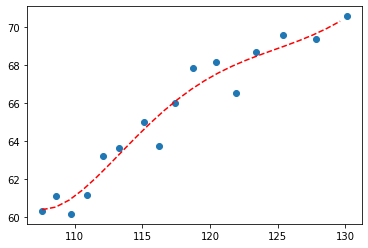

In [7]:
# define the true objective function
def func(x, a, b, c, d, e, f):
    return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + (e * x**5) + f

# curve fit
popt, _ = curve_fit(func, x, y)

# summarize the parameter values
a, b, c, d, e, f = popt
print('y = %.5f * x + %.5f * x^2 + %.5f * x^3 + %.5f * x^4 + %.5f * x^5 + %.5f'  % (a, b, c, d, e, f))

# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(x), max(x), 1)

# calculate the output for the range
y_line = func(x_line, a, b, c, d, e, f)

# plot input vs output
fig = plt.figure()
plt.scatter(x, y)
plt.plot(x_line, y_line, '--', color='red')
plt.show()

### 2.3 Use complicated function

y = 0.88310 * sin(1.48623 - x) + 0.00206 * x^2 + 36.90462


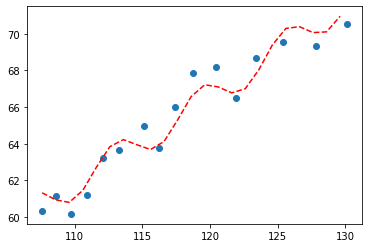

In [8]:
# define the true objective function
def func(x, a, b, c, d):
    return a * np.sin(b - x) + c * x**2 + d

# curve fit
popt, _ = curve_fit(func, x, y)

# summarize the parameter values
a, b, c, d = popt
print('y = %.5f * sin(%.5f - x) + %.5f * x^2 + %.5f'  % (a, b, c, d))

# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(x), max(x), 1)

# calculate the output for the range
y_line = func(x_line, a, b, c, d)

# plot input vs output
fig = plt.figure()
plt.scatter(x, y)
plt.plot(x_line, y_line, '--', color='red')
plt.show()